### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("C:/Users/butte/Classwork/Alphabet_Soup/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE

application_df = application_df.drop(columns=["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE# Generate categorical variable list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE

application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

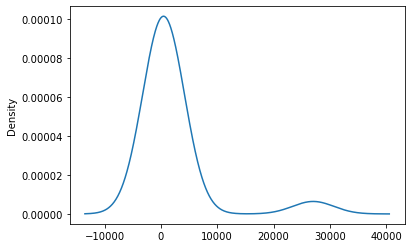

In [5]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
application_type_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(application_type_counts[application_type_counts < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

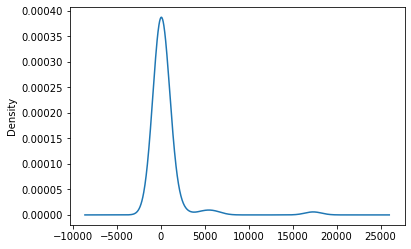

In [8]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\butte\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\butte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Create a callback checkpoint path

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [19]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    # checkpoint directory and file structure previously defined
    filepath=checkpoint_path,
    # notify when a checkpoint is being saved to the directory
    verbose=1,
    # checkpoint files take up minimal space by saving weights only
    save_weights_only=True,
    # checkpoints will be saved every 5 epochs
    save_freq=5)

In [21]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 18:32 - loss: 286.6885 - accuracy: 0.3750
Epoch 1: saving model to checkpoints\weights.01.hdf5
  5/804 [..............................] - ETA: 13s - loss: 448.7179 - accuracy: 0.5000  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 7s - loss: 1955.3130 - accuracy: 0.4708
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 25/804 [..............................] - ETA: 6s - loss: 4826.0522 - accuracy: 0.4588
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 35/804 [>.............................] - ETA: 5s - loss: 3775.5168 - accuracy: 0.4786
Epoch 1: saving model to checkpoints\weights.01.hdf5
 42/804 [>.............................] - ETA: 5s - loss: 3291.4653 - accuracy: 0.4911
Epoch 1: saving model to chec


Epoch 1: saving model to checkpoints\weights.01.hdf5
390/804 [=============>................] - ETA: 3s - loss: 20609.7246 - accuracy: 0.4950
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
400/804 [=============>................] - ETA: 3s - loss: 20102.4375 - accuracy: 0.4961
Epoch 1: saving model to checkpoints\weights.01.hdf5
405/804 [==============>...............] - ETA: 3s - loss: 19858.5898 - accuracy: 0.4963
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 20030.4414 - accuracy: 0.4966
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 28430.3359 - accuracy: 0.4955
Epoch 1: saving model to checkpoints\weights.01.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 28570.9648 - ac

795/804 [============================>.] - ETA: 0s - loss: 111802.1641 - accuracy: 0.5019
Epoch 1: saving model to checkpoints\weights.01.hdf5
804/804 [==============================] - 7s 7ms/step - loss: 110739.5781 - accuracy: 0.5023
Epoch 2/100

Epoch 2: saving model to checkpoints\weights.02.hdf5
  1/804 [..............................] - ETA: 12s - loss: 265843.8125 - accuracy: 0.5625
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 11/804 [..............................] - ETA: 6s - loss: 24490.6875 - accuracy: 0.5114  
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
 21/804 [..............................] - ETA: 5s - loss: 146634.0156 - accuracy: 0.4970
Epoch 2: saving model to checkpoints\weights.02.hdf5
 30/804 [>.............................] - ETA: 5s - loss: 106193.5312 - accuracy: 0.5177
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: savin


Epoch 2: saving model to checkpoints\weights.02.hdf5
401/804 [=============>................] - ETA: 2s - loss: 133493.2344 - accuracy: 0.5058
Epoch 2: saving model to checkpoints\weights.02.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 130575.3750 - accuracy: 0.5053
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 127796.5469 - accuracy: 0.5038
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 125700.7344 - accuracy: 0.5030
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
436/804 [===============>..............] - ETA: 2s - loss: 122912.9375 - accuracy: 0.5027
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
446/804 [======

  1/804 [..............................] - ETA: 6s - loss: 2608.9919 - accuracy: 0.6562
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 10/804 [..............................] - ETA: 4s - loss: 5119.0146 - accuracy: 0.5406
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 17/804 [..............................] - ETA: 5s - loss: 3660.6580 - accuracy: 0.5662
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 2928.9219 - accuracy: 0.5567
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 37/804 [>.............................] - ETA: 5s - loss: 6672.2095 - accuracy: 0.5600
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 47/804 [>...............

407/804 [==============>...............] - ETA: 2s - loss: 15535.2715 - accuracy: 0.5177
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 15167.1738 - accuracy: 0.5166
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 14911.1006 - accuracy: 0.5162
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 14570.7705 - accuracy: 0.5174
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 14259.7285 - accuracy: 0.5180
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
457/804 [===========

  8/804 [..............................] - ETA: 6s - loss: 4664.6064 - accuracy: 0.5000
Epoch 4: saving model to checkpoints\weights.04.hdf5
 17/804 [..............................] - ETA: 5s - loss: 8576.9004 - accuracy: 0.4835
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 25/804 [..............................] - ETA: 5s - loss: 7248.4570 - accuracy: 0.4613
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 33/804 [>.............................] - ETA: 5s - loss: 6098.5464 - accuracy: 0.4621
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 43/804 [>.............................] - ETA: 5s - loss: 9134.3096 - accuracy: 0.4680
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 54/804 [=>............................] - ETA: 4s - loss: 10444.4492 - accurac

418/804 [==============>...............] - ETA: 2s - loss: 14524.5488 - accuracy: 0.4786
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 15226.5439 - accuracy: 0.4777
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 15564.4053 - accuracy: 0.4782
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 15923.2510 - accuracy: 0.4773
Epoch 4: saving model to checkpoints\weights.04.hdf5
457/804 [================>.............] - ETA: 2s - loss: 15993.1426 - accuracy: 0.4762
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
463/804 [================>.............] - ETA: 2s - loss: 15889.0693 - ac

 19/804 [..............................] - ETA: 5s - loss: 16820.2539 - accuracy: 0.4704
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 11099.9727 - accuracy: 0.4720
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 10294.6855 - accuracy: 0.4904
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 8204.6904 - accuracy: 0.5051 
Epoch 5: saving model to checkpoints\weights.05.hdf5
 56/804 [=>............................] - ETA: 4s - loss: 7418.5659 - accuracy: 0.5134
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 64/804 [=>............................] - ETA: 4s - loss: 6493.8896 - accu

429/804 [===============>..............] - ETA: 2s - loss: 40462.4180 - accuracy: 0.4924
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
439/804 [===============>..............] - ETA: 2s - loss: 39684.6250 - accuracy: 0.4923
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 38813.1797 - accuracy: 0.4914
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
459/804 [================>.............] - ETA: 2s - loss: 38251.6016 - accuracy: 0.4920
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
469/804 [================>.............] - ETA: 2s - loss: 37621.9062 - accuracy: 0.4914
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
479/804 [===========

 30/804 [>.............................] - ETA: 5s - loss: 133.6689 - accuracy: 0.5063
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 161.8351 - accuracy: 0.4992
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
 50/804 [>.............................] - ETA: 5s - loss: 220.2316 - accuracy: 0.5181
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
 60/804 [=>............................] - ETA: 5s - loss: 186.0178 - accuracy: 0.5208
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
 70/804 [=>............................] - ETA: 5s - loss: 173.3385 - accuracy: 0.5161
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
 80/804 [=>...................


Epoch 6: saving model to checkpoints\weights.06.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 15883.3867 - accuracy: 0.5094
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
460/804 [================>.............] - ETA: 2s - loss: 15539.5654 - accuracy: 0.5107
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
470/804 [================>.............] - ETA: 2s - loss: 15210.7949 - accuracy: 0.5108
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
480/804 [================>.............] - ETA: 2s - loss: 14894.3447 - accuracy: 0.5115
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
490/804 [=================>............] - ETA: 2s - loss: 14594.4365 - accuracy: 0.5122
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving mod

 47/804 [>.............................] - ETA: 5s - loss: 4179.0205 - accuracy: 0.4668
Epoch 7: saving model to checkpoints\weights.07.hdf5
 55/804 [=>............................] - ETA: 5s - loss: 4162.7666 - accuracy: 0.4744
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 61/804 [=>............................] - ETA: 5s - loss: 4177.3726 - accuracy: 0.4775
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 71/804 [=>............................] - ETA: 5s - loss: 3935.8420 - accuracy: 0.4872
Epoch 7: saving model to checkpoints\weights.07.hdf5
 80/804 [=>............................] - ETA: 5s - loss: 4525.8335 - accuracy: 0.4902
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 86/804 [==>...........................] - ETA: 5s - loss: 4244.8516 - accuracy: 0.4927
Epoch 7: saving model to checkpoints\weights.

451/804 [===============>..............] - ETA: 2s - loss: 14768.5713 - accuracy: 0.5060
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
461/804 [================>.............] - ETA: 2s - loss: 14448.4014 - accuracy: 0.5073
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
471/804 [================>.............] - ETA: 2s - loss: 14142.2959 - accuracy: 0.5081
Epoch 7: saving model to checkpoints\weights.07.hdf5
478/804 [================>.............] - ETA: 2s - loss: 13935.5723 - accuracy: 0.5086
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
486/804 [=================>............] - ETA: 2s - loss: 13706.5508 - accuracy: 0.5087
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
496/804 [=================>............] - ETA: 2s - loss: 13431.7412 - ac


Epoch 8: saving model to checkpoints\weights.08.hdf5
 57/804 [=>............................] - ETA: 5s - loss: 388.0098 - accuracy: 0.5126
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
 67/804 [=>............................] - ETA: 5s - loss: 330.8076 - accuracy: 0.5243
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
 77/804 [=>............................] - ETA: 5s - loss: 289.0211 - accuracy: 0.5276
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 257.1067 - accuracy: 0.5266
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 230.9565 - accuracy: 0.5271
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to chec

467/804 [================>.............] - ETA: 2s - loss: 1136.2692 - accuracy: 0.5185
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
477/804 [================>.............] - ETA: 2s - loss: 1159.2290 - accuracy: 0.5167
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
487/804 [=================>............] - ETA: 2s - loss: 1161.4683 - accuracy: 0.5150
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
497/804 [=================>............] - ETA: 2s - loss: 1207.6527 - accuracy: 0.5135
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
507/804 [=================>............] - ETA: 2s - loss: 6235.9575 - accuracy: 0.5131
Epoch 8: saving model to checkpoints\weights.08.hdf5
514/804 [==================>...........] - ETA: 2s - loss: 6188.6973 - accuracy

 48/804 [>.............................] - ETA: 6s - loss: 10.4411 - accuracy: 0.4824
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 58/804 [=>............................] - ETA: 6s - loss: 8.8652 - accuracy: 0.4811 
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 68/804 [=>............................] - ETA: 6s - loss: 7.9072 - accuracy: 0.4867
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 78/804 [=>............................] - ETA: 5s - loss: 8.1711 - accuracy: 0.4928
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 88/804 [==>...........................] - ETA: 5s - loss: 7.9988 - accuracy: 0.4908
Epoch 9: saving model to checkpoints\weights.09.hdf5
 95/804 [==>...........................] - ETA: 5s - loss: 15.4369 - accuracy: 0.4885
Epoch 

438/804 [===============>..............] - ETA: 2s - loss: 147.4352 - accuracy: 0.5239
Epoch 9: saving model to checkpoints\weights.09.hdf5
446/804 [===============>..............] - ETA: 2s - loss: 156.3730 - accuracy: 0.5249
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 154.4469 - accuracy: 0.5250
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
463/804 [================>.............] - ETA: 2s - loss: 154.2458 - accuracy: 0.5246
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
473/804 [================>.............] - ETA: 2s - loss: 151.1667 - accuracy: 0.5260
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
483/804 [=================>............] - ETA: 2s - loss: 148.0910 - accuracy: 0.52

 19/804 [..............................] - ETA: 6s - loss: 848.7528 - accuracy: 0.4868
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
 29/804 [>.............................] - ETA: 5s - loss: 564.2426 - accuracy: 0.4763
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
 39/804 [>.............................] - ETA: 5s - loss: 420.3284 - accuracy: 0.4856
Epoch 10: saving model to checkpoints\weights.10.hdf5
 48/804 [>.............................] - ETA: 5s - loss: 378.7095 - accuracy: 0.4850
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
 54/804 [=>............................] - ETA: 5s - loss: 374.7202 - accuracy: 0.4873
Epoch 10: saving model to checkpoints\weights.10.hdf5
 63/804 [=>............................] - ETA: 5s - loss: 332.2196 - accuracy: 0.4871
Epoch 10: saving model to checkpoints\weigh

409/804 [==============>...............] - ETA: 3s - loss: 743.9283 - accuracy: 0.4992
Epoch 10: saving model to checkpoints\weights.10.hdf5
417/804 [==============>...............] - ETA: 3s - loss: 733.8148 - accuracy: 0.4984
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
424/804 [==============>...............] - ETA: 2s - loss: 722.6353 - accuracy: 0.4982
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
434/804 [===============>..............] - ETA: 2s - loss: 708.4135 - accuracy: 0.4973
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
444/804 [===============>..............] - ETA: 2s - loss: 693.3287 - accuracy: 0.4970
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 679.2623 - accur

800/804 [============================>.] - ETA: 0s - loss: 638.3228 - accuracy: 0.5035
Epoch 10: saving model to checkpoints\weights.10.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 658.1357 - accuracy: 0.5037
Epoch 11/100
  1/804 [..............................] - ETA: 6s - loss: 42.0462 - accuracy: 0.6250
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 10/804 [..............................] - ETA: 6s - loss: 109.8374 - accuracy: 0.6000
Epoch 11: saving model to checkpoints\weights.11.hdf5
 17/804 [..............................] - ETA: 6s - loss: 5589.4824 - accuracy: 0.5515
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 25/804 [..............................] - ETA: 6s - loss: 3904.7009 - accuracy: 0.5475
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 35/804 [>...............

385/804 [=============>................] - ETA: 3s - loss: 632.6522 - accuracy: 0.5333
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
396/804 [=============>................] - ETA: 3s - loss: 615.0998 - accuracy: 0.5319
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
405/804 [==============>...............] - ETA: 3s - loss: 601.4476 - accuracy: 0.5311
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 586.9732 - accuracy: 0.5300
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 573.1799 - accuracy: 0.5291
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
435/804 [===========

790/804 [============================>.] - ETA: 0s - loss: 308.6873 - accuracy: 0.5318
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 303.3713 - accuracy: 0.5322
Epoch 12/100

Epoch 12: saving model to checkpoints\weights.12.hdf5
  1/804 [..............................] - ETA: 19s - loss: 0.7453 - accuracy: 0.4688
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 11/804 [..............................] - ETA: 5s - loss: 0.7141 - accuracy: 0.5256 
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 21/804 [..............................] - ETA: 5s - loss: 0.7075 - accuracy: 0.5372
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.

401/804 [=============>................] - ETA: 2s - loss: 0.7022 - accuracy: 0.5342
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.7021 - accuracy: 0.5339
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.7021 - accuracy: 0.5334
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.7017 - accuracy: 0.5339
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.7015 - accuracy: 0.5338
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
451/804 [===============>.....


Epoch 13: saving model to checkpoints\weights.13.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6782 - accuracy: 0.5368
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.6779 - accuracy: 0.5289
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 37/804 [>.............................] - ETA: 5s - loss: 0.6749 - accuracy: 0.5380
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 47/804 [>.............................] - ETA: 5s - loss: 0.6745 - accuracy: 0.5366
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 0.6769 - accuracy: 0.5312
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to che

432/804 [===============>..............] - ETA: 2s - loss: 0.6731 - accuracy: 0.5240
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
442/804 [===============>..............] - ETA: 2s - loss: 0.6727 - accuracy: 0.5243
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
452/804 [===============>..............] - ETA: 2s - loss: 0.6722 - accuracy: 0.5257
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
462/804 [================>.............] - ETA: 2s - loss: 0.6722 - accuracy: 0.5255
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.6720 - accuracy: 0.5264
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
482/804 [================>....

 38/804 [>.............................] - ETA: 4s - loss: 0.6509 - accuracy: 0.5658
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.6501 - accuracy: 0.5703
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.6544 - accuracy: 0.5598
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.6560 - accuracy: 0.5547
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.6550 - accuracy: 0.5569
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
 88/804 [==>..................

458/804 [================>.............] - ETA: 2s - loss: 0.6577 - accuracy: 0.5422
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6579 - accuracy: 0.5438
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6578 - accuracy: 0.5453
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
488/804 [=================>............] - ETA: 2s - loss: 0.6578 - accuracy: 0.5459
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.6578 - accuracy: 0.5467
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
508/804 [=================>...


Epoch 15: saving model to checkpoints\weights.15.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6515 - accuracy: 0.6250
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.6524 - accuracy: 0.6234
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 89/804 [==>...........................] - ETA: 4s - loss: 0.6508 - accuracy: 0.6257
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 99/804 [==>...........................] - ETA: 4s - loss: 0.6502 - accuracy: 0.6206
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
109/804 [===>..........................] - ETA: 4s - loss: 0.6508 - accuracy: 0.6210
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to che


Epoch 15: saving model to checkpoints\weights.15.hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6489 - accuracy: 0.6219
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6488 - accuracy: 0.6222
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6486 - accuracy: 0.6228
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6489 - accuracy: 0.6216
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.6492 - accuracy: 0.6210
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to che

 95/804 [==>...........................] - ETA: 4s - loss: 0.6520 - accuracy: 0.6365
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
105/804 [==>...........................] - ETA: 4s - loss: 0.6520 - accuracy: 0.6342
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
115/804 [===>..........................] - ETA: 4s - loss: 0.6503 - accuracy: 0.6359
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
125/804 [===>..........................] - ETA: 4s - loss: 0.6498 - accuracy: 0.6367
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
135/804 [====>.........................] - ETA: 4s - loss: 0.6485 - accuracy: 0.6387
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
145/804 [====>................

507/804 [=================>............] - ETA: 1s - loss: 0.6432 - accuracy: 0.6365
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6433 - accuracy: 0.6363
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6435 - accuracy: 0.6361
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.6438 - accuracy: 0.6355
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.6435 - accuracy: 0.6365
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
555/804 [===================>.


Epoch 17: saving model to checkpoints\weights.17.hdf5
116/804 [===>..........................] - ETA: 4s - loss: 0.6426 - accuracy: 0.6398
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
126/804 [===>..........................] - ETA: 4s - loss: 0.6407 - accuracy: 0.6438
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
136/804 [====>.........................] - ETA: 4s - loss: 0.6413 - accuracy: 0.6429
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
146/804 [====>.........................] - ETA: 4s - loss: 0.6408 - accuracy: 0.6443
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
156/804 [====>.........................] - ETA: 4s - loss: 0.6391 - accuracy: 0.6454
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to che

521/804 [==================>...........] - ETA: 1s - loss: 0.6387 - accuracy: 0.6504
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6391 - accuracy: 0.6494
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.6390 - accuracy: 0.6493
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.6392 - accuracy: 0.6487
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.6397 - accuracy: 0.6481
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
571/804 [====================>

127/804 [===>..........................] - ETA: 4s - loss: 0.6366 - accuracy: 0.6457
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
137/804 [====>.........................] - ETA: 4s - loss: 0.6354 - accuracy: 0.6485
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
147/804 [====>.........................] - ETA: 4s - loss: 0.6363 - accuracy: 0.6484
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
157/804 [====>.........................] - ETA: 4s - loss: 0.6381 - accuracy: 0.6465
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
167/804 [=====>........................] - ETA: 4s - loss: 0.6381 - accuracy: 0.6482
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
177/804 [=====>...............

547/804 [===================>..........] - ETA: 1s - loss: 0.6367 - accuracy: 0.6502
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6367 - accuracy: 0.6499
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6369 - accuracy: 0.6500
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.6368 - accuracy: 0.6503
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.6367 - accuracy: 0.6503
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
597/804 [=====================


Epoch 19: saving model to checkpoints\weights.19.hdf5
158/804 [====>.........................] - ETA: 4s - loss: 0.6332 - accuracy: 0.6501
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
168/804 [=====>........................] - ETA: 4s - loss: 0.6321 - accuracy: 0.6523
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
178/804 [=====>........................] - ETA: 4s - loss: 0.6330 - accuracy: 0.6512
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
188/804 [======>.......................] - ETA: 4s - loss: 0.6336 - accuracy: 0.6504
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
198/804 [======>.......................] - ETA: 4s - loss: 0.6324 - accuracy: 0.6520
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to che

563/804 [====================>.........] - ETA: 1s - loss: 0.6339 - accuracy: 0.6489
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6341 - accuracy: 0.6490
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6344 - accuracy: 0.6486
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6348 - accuracy: 0.6482
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6345 - accuracy: 0.6486
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
613/804 [=====================

169/804 [=====>........................] - ETA: 4s - loss: 0.6285 - accuracy: 0.6553
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.6294 - accuracy: 0.6542
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.6287 - accuracy: 0.6554
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.6305 - accuracy: 0.6528
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.6294 - accuracy: 0.6546
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
219/804 [=======>.............

589/804 [====================>.........] - ETA: 1s - loss: 0.6323 - accuracy: 0.6506
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6322 - accuracy: 0.6508
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6325 - accuracy: 0.6505
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6328 - accuracy: 0.6502
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.6329 - accuracy: 0.6500
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
639/804 [=====================

195/804 [======>.......................] - ETA: 4s - loss: 0.6315 - accuracy: 0.6548
Epoch 21: saving model to checkpoints\weights.21.hdf5
204/804 [======>.......................] - ETA: 4s - loss: 0.6318 - accuracy: 0.6536
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
210/804 [======>.......................] - ETA: 4s - loss: 0.6320 - accuracy: 0.6524
Epoch 21: saving model to checkpoints\weights.21.hdf5
219/804 [=======>......................] - ETA: 4s - loss: 0.6320 - accuracy: 0.6530
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
225/804 [=======>......................] - ETA: 4s - loss: 0.6316 - accuracy: 0.6539
Epoch 21: saving model to checkpoints\weights.21.hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.6318 - accuracy: 0.6532
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
2

595/804 [=====================>........] - ETA: 1s - loss: 0.6332 - accuracy: 0.6505
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.6333 - accuracy: 0.6503
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6334 - accuracy: 0.6499
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6330 - accuracy: 0.6506
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.6328 - accuracy: 0.6507
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
645/804 [=====================

206/804 [======>.......................] - ETA: 3s - loss: 0.6271 - accuracy: 0.6578
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
216/804 [=======>......................] - ETA: 3s - loss: 0.6278 - accuracy: 0.6571
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
226/804 [=======>......................] - ETA: 3s - loss: 0.6287 - accuracy: 0.6551
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
236/804 [=======>......................] - ETA: 3s - loss: 0.6286 - accuracy: 0.6564
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
246/804 [========>.....................] - ETA: 3s - loss: 0.6290 - accuracy: 0.6560
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
256/804 [========>............


Epoch 22: saving model to checkpoints\weights.22.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6298 - accuracy: 0.6535
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6300 - accuracy: 0.6535
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.6301 - accuracy: 0.6537
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6306 - accuracy: 0.6530
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6307 - accuracy: 0.6532
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to che


Epoch 23: saving model to checkpoints\weights.23.hdf5
242/804 [========>.....................] - ETA: 3s - loss: 0.6398 - accuracy: 0.6393
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
252/804 [========>.....................] - ETA: 3s - loss: 0.6392 - accuracy: 0.6403
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
262/804 [========>.....................] - ETA: 3s - loss: 0.6384 - accuracy: 0.6416
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
272/804 [=========>....................] - ETA: 3s - loss: 0.6376 - accuracy: 0.6427
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
282/804 [=========>....................] - ETA: 3s - loss: 0.6378 - accuracy: 0.6435
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to che

657/804 [=======================>......] - ETA: 1s - loss: 0.6317 - accuracy: 0.6513
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6312 - accuracy: 0.6519
Epoch 23: saving model to checkpoints\weights.23.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6312 - accuracy: 0.6516
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6312 - accuracy: 0.6515
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6315 - accuracy: 0.6511
Epoch 23: saving model to checkpoints\weights.23.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6318 - accuracy: 0.6509
Epoch 23: saving model to checkpoints\weights.23.hdf5



258/804 [========>.....................] - ETA: 3s - loss: 0.6287 - accuracy: 0.6542
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.6287 - accuracy: 0.6535
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
278/804 [=========>....................] - ETA: 3s - loss: 0.6277 - accuracy: 0.6549
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
288/804 [=========>....................] - ETA: 3s - loss: 0.6273 - accuracy: 0.6556
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 0.6273 - accuracy: 0.6553
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
308/804 [==========>..........


Epoch 24: saving model to checkpoints\weights.24.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6281 - accuracy: 0.6560
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6284 - accuracy: 0.6556
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6279 - accuracy: 0.6562
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6281 - accuracy: 0.6560
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6280 - accuracy: 0.6562
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to che


Epoch 25: saving model to checkpoints\weights.25.hdf5
285/804 [=========>....................] - ETA: 3s - loss: 0.6256 - accuracy: 0.6634
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
296/804 [==========>...................] - ETA: 3s - loss: 0.6252 - accuracy: 0.6648
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
304/804 [==========>...................] - ETA: 3s - loss: 0.6271 - accuracy: 0.6613
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.6299 - accuracy: 0.6562
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.6325 - accuracy: 0.6513
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to che


Epoch 25: saving model to checkpoints\weights.25.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6718 - accuracy: 0.5536
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6721 - accuracy: 0.5525
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6724 - accuracy: 0.5514
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6726 - accuracy: 0.5513
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6730 - accuracy: 0.5499
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to che

300/804 [==========>...................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5288
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
310/804 [==========>...................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5289
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5283
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
330/804 [===========>..................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5277
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5273
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
350/804 [============>........

720/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5307
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5312
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5307
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5307
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5302
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
770/804 [=====================


Epoch 27: saving model to checkpoints\weights.27.hdf5
331/804 [===========>..................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5296
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
341/804 [===========>..................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5301
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
351/804 [============>.................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5296
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5302
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5292
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to che

736/804 [==========================>...] - ETA: 0s - loss: 0.6900 - accuracy: 0.5322
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6899 - accuracy: 0.5325
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6899 - accuracy: 0.5325
Epoch 27: saving model to checkpoints\weights.27.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6899 - accuracy: 0.5329
Epoch 27: saving model to checkpoints\weights.27.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6899 - accuracy: 0.5329
Epoch 27: saving model to checkpoints\weights.27.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6899 - accuracy: 0.5324
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
7

332/804 [===========>..................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5329
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
342/804 [===========>..................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5322
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
352/804 [============>.................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
362/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5324
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
372/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
384/804 [=============>.......

752/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 28: saving model to checkpoints\weights.28.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 28: saving model to checkpoints\weights.28.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 28: saving model to checkpoints\weights.28.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
7

338/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5313
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
348/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
358/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5319
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
368/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5322
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
378/804 [=============>................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
388/804 [=============>.......

758/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 29: saving model to checkpoints\weights.29.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.6911 - accuracy: 0.5

354/804 [============>.................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5320
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
364/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
374/804 [============>.................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 30: saving model to checkpoints\weights.30.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5327


774/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 31/100
  1/804 [..............................] - ETA: 0s - loss: 0.7029 - accuracy: 0.4375
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5375
Epoch 31: saving model to checkpoints

380/804 [=============>................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5281
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5283
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5295
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5318
Epoch 31: saving model to checkpoints\weights.31.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5319


780/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 32/100

Epoch 32: saving model to checkpoints\weights.32.hdf5
  1/804 [..............................] - ETA: 12s - loss: 0.6871 - accuracy: 0.5625
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5341 
Epoch 32: saving model to checkpoints\weights.32.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6937 - accuracy: 0.5122
Epoch 32: saving model to checkpoin

386/804 [=============>................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5351
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
437/804 [===============>.....

  1/804 [..............................] - ETA: 6s - loss: 0.6873 - accuracy: 0.5625
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
  7/804 [..............................] - ETA: 7s - loss: 0.6895 - accuracy: 0.5446
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 17/804 [..............................] - ETA: 6s - loss: 0.6889 - accuracy: 0.5496
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.6884 - accuracy: 0.5532
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 37/804 [>.............................] - ETA: 5s - loss: 0.6897 - accuracy: 0.5431
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
 47/804 [>....................

417/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5303
Epoch 33: saving model to checkpoints\weights.33.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
442/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
452/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 33: saving model to checkpoints\weights.33.hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 33: saving model to checkpoints\weights.33.hdf5



 18/804 [..............................] - ETA: 5s - loss: 0.6894 - accuracy: 0.5451
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.6925 - accuracy: 0.5212
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5230
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5261
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5350
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 68/804 [=>...................

438/804 [===============>..............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5343
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5343
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
478/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
488/804 [=================>...

 39/804 [>.............................] - ETA: 5s - loss: 0.6929 - accuracy: 0.5176
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5255
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5270
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5389
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5360
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
 89/804 [==>..................


Epoch 35: saving model to checkpoints\weights.35.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5364
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5361
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5365
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5363
Epoch 35: saving model to checkpoints\weights.35.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
511/804 [==================>..

 70/804 [=>............................] - ETA: 4s - loss: 0.6888 - accuracy: 0.5504
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.6895 - accuracy: 0.5449
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5413
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
100/804 [==>...........................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5462
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
110/804 [===>..........................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5463
Epoch 36: saving model to checkpoints\weights.36.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.6888 - accuracy: 0.5503


490/804 [=================>............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
540/804 [===================>.

101/804 [==>...........................] - ETA: 4s - loss: 0.6927 - accuracy: 0.5189
Epoch 37: saving model to checkpoints\weights.37.hdf5
109/804 [===>..........................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5209
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5246
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
130/804 [===>..........................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5238
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
139/804 [====>.........................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5225
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
147/804 [====>.........................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5238



Epoch 37: saving model to checkpoints\weights.37.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5286
Epoch 37: saving model to checkpoints\weights.37.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5295
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5295
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to che

131/804 [===>..........................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5289
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
137/804 [====>.........................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5287
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
147/804 [====>.........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5293
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
159/804 [====>.........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
167/804 [=====>........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5311
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
177/804 [=====>...............

552/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 38: saving model to checkpoints\weights.38.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329


158/804 [====>.........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5275
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
168/804 [=====>........................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5283
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
181/804 [=====>........................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5262
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
193/804 [======>.......................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5266
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
203/804 [======>.......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5285
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to che

578/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
618/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
628/804 [=====================

189/804 [======>.......................] - ETA: 3s - loss: 0.6894 - accuracy: 0.5445
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.6891 - accuracy: 0.5463
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.6890 - accuracy: 0.5468
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.6889 - accuracy: 0.5474
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.6890 - accuracy: 0.5472
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
239/804 [=======>.............

604/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5316
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5310
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
654/804 [=====================


Epoch 41: saving model to checkpoints\weights.41.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5338
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5327
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5346
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
250/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5349
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5359
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to che

640/804 [======================>.......] - ETA: 1s - loss: 0.6905 - accuracy: 0.5366
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.6906 - accuracy: 0.5360
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5358
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5360
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
690/804 [=====================

246/804 [========>.....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5343
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5349
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
266/804 [========>.....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5337
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
276/804 [=========>....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
286/804 [=========>....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5329
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
296/804 [==========>..........

666/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5347
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
716/804 [=====================


Epoch 43: saving model to checkpoints\weights.43.hdf5
277/804 [=========>....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5275
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5281
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
297/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5282
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5284
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
317/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5295
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to che

692/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
742/804 [=====================

298/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
318/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5313
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
328/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 44: saving model to checkpoints\weights.44.hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317


708/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to che

314/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5299
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
324/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 45: saving model to checkpoints\weights.45.hdf5
330/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5299
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
339/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5298
Epoch 45: saving model to checkpoints\weights.45.hdf5
346/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5300
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
354/804 [============>.................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5303
Epoch 45: saving model to checkpoints\weights.45.hdf5



724/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 45: saving model to checkpoints\weights.45.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319


335/804 [===========>..................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5355
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5351
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5343
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
377/804 [=============>................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
386/804 [=============>.......


Epoch 46: saving model to checkpoints\weights.46.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 47/100

Epoch 47: saving model to checkpoints\weights.47.hdf5
  1/804 [...

366/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
416/804 [==============>......

786/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 47: saving model to checkpoints\weights.47.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 48/100
  1/804 [..............................] - ETA: 12s - loss: 0.7147 - accuracy: 0.3438
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
  9/804 [..............................] - ETA: 6s - loss: 0.6942 - accuracy: 0.5069 
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.6937 - accuracy: 0.5109
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoin

397/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 48: saving model to checkpoints\weights.48.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
412/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
422/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
432/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
442/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5338



Epoch 49: saving model to checkpoints\weights.49.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.6973 - accuracy: 0.4844
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6922 - accuracy: 0.5243
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.6917 - accuracy: 0.5279
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.6924 - accuracy: 0.5222
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
 48/804 [>.............................] - ETA: 5s - loss: 0.6923 - accuracy: 0.5228
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to che

423/804 [==============>...............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5289
Epoch 49: saving model to checkpoints\weights.49.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5288
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
439/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5283
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5282
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5291


 29/804 [>.............................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5431
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5449
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5376
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5344
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 79/804 [=>...................

444/804 [===============>..............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5286
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5286
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
464/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5295
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5295
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
494/804 [=================>...

 50/804 [>.............................] - ETA: 5s - loss: 0.6888 - accuracy: 0.5487
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 60/804 [=>............................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5380
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 70/804 [=>............................] - ETA: 5s - loss: 0.6908 - accuracy: 0.5348
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5324
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5281
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
100/804 [==>..................

473/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5310
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 51: saving model to checkpoints\weights.51.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
520/804 [==================>..

 81/804 [==>...........................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5428
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
 91/804 [==>...........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5395
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
101/804 [==>...........................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5415
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
111/804 [===>..........................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5386
Epoch 52: saving model to checkpoints\weights.52.hdf5
120/804 [===>..........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5357
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
126/804 [===>..........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5345


501/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5334
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
551/804 [===================>.


Epoch 53: saving model to checkpoints\weights.53.hdf5
117/804 [===>..........................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5414
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
127/804 [===>..........................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5421
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
137/804 [====>.........................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5408
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
147/804 [====>.........................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5393
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
157/804 [====>.........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5378
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to che


Epoch 53: saving model to checkpoints\weights.53.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to che


Epoch 54: saving model to checkpoints\weights.54.hdf5
148/804 [====>.........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
158/804 [====>.........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5309
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
168/804 [=====>........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 54: saving model to checkpoints\weights.54.hdf5
175/804 [=====>........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5314
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
183/804 [=====>........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5304
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
193/804 [======>..............

555/804 [===================>..........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5372
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5364
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5363
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5359
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
603/804 [=====================

149/804 [====>.........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5380
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
159/804 [====>.........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5371
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
169/804 [=====>........................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5394
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
179/804 [=====>........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5375
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5379
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
199/804 [======>..............

571/804 [====================>.........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5361
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5350
Epoch 55: saving model to checkpoints\weights.55.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5350
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
619/804 [=====================

170/804 [=====>........................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5366
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5351
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5352
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5337
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5366
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
220/804 [=======>.............

578/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
625/804 [=====================

186/804 [=====>........................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5412
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
196/804 [======>.......................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5386
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
206/804 [======>.......................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5378
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
216/804 [=======>......................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5367
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
226/804 [=======>......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5365
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
236/804 [=======>.............


Epoch 57: saving model to checkpoints\weights.57.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5350
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5351
Epoch 57: saving model to checkpoints\weights.57.hdf5
659/804 [=====================

212/804 [======>.......................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5295
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
222/804 [=======>......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5291
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
232/804 [=======>......................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5299
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
242/804 [========>.....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5294
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
252/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5303
Epoch 58: saving model to checkpoints\weights.58.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309



Epoch 58: saving model to checkpoints\weights.58.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5302
Epoch 58: saving model to che


Epoch 59: saving model to checkpoints\weights.59.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5291
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5292
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5297
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
278/804 [=========>....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5304
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
290/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5311
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to che

668/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
718/804 [=====================

279/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5304
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
309/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
319/804 [==========>...................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
329/804 [===========>.........

694/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 60: saving model to checkpoints\weights.60.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321


305/804 [==========>...................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5267
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5268
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5273
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
335/804 [===========>..................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5274
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5284
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
355/804 [============>........


Epoch 61: saving model to checkpoints\weights.61.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to che


Epoch 62: saving model to checkpoints\weights.62.hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5302
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
346/804 [===========>..................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5298
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
356/804 [============>.................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
366/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to che

746/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 62: saving model to checkpoints\weights.62.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322


347/804 [===========>..................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5377
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
357/804 [============>.................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5375
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
367/804 [============>.................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5381
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
377/804 [=============>................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5361
Epoch 63: saving model to checkpoints\weights.63.hdf5
383/804 [=============>................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5370
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
392/804 [=============>................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5365


762/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 63: saving model to checkpoints\weights.63.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 63: saving model to checkpoints\weights.63.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 64/100
  1/804 [.............................


Epoch 64: saving model to checkpoints\weights.64.hdf5
373/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
383/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
393/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
403/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
413/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to che

788/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 64: saving model to checkpoints\weights.64.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 65/100
  1/804 [..............................] - ETA: 0s - loss: 0.6871 - accuracy: 0.5625
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6880 - accuracy: 0.5556
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.6890 - accuracy: 0.5477
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints

394/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
414/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5311
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
434/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
444/804 [===============>.....

  1/804 [..............................] - ETA: 0s - loss: 0.7037 - accuracy: 0.4375
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5406
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5375
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 30/804 [>.............................] - ETA: 5s - loss: 0.6895 - accuracy: 0.5437
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5430
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
 50/804 [>....................


Epoch 66: saving model to checkpoints\weights.66.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5329
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 66: saving model to checkpoints\weights.66.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
470/804 [================>....

 31/804 [>.............................] - ETA: 4s - loss: 0.6889 - accuracy: 0.5494
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5335
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 51/804 [>.............................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5343
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 61/804 [=>............................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5328
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 71/804 [=>............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 81/804 [==>..................


Epoch 67: saving model to checkpoints\weights.67.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
476/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5293
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to che


Epoch 68: saving model to checkpoints\weights.68.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5238
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5268
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5237
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
 97/804 [==>...........................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5248
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5310
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to che

487/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
537/804 [===================>.

 94/804 [==>...........................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5402
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
103/804 [==>...........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5358
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
113/804 [===>..........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5348
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
123/804 [===>..........................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5340
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
135/804 [====>.........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
143/804 [====>................


Epoch 69: saving model to checkpoints\weights.69.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to che


Epoch 70: saving model to checkpoints\weights.70.hdf5
124/804 [===>..........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5363
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
134/804 [====>.........................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5352
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
144/804 [====>.........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5330
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
154/804 [====>.........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5343
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
164/804 [=====>........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5349
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to che

539/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to che

155/804 [====>.........................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5282
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
165/804 [=====>........................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5292
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
176/804 [=====>........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5273
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
187/804 [=====>........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5266
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5237
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
205/804 [======>..............

570/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 71: saving model to checkpoints\weights.71.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325



Epoch 72: saving model to checkpoints\weights.72.hdf5
186/804 [=====>........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5349
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
196/804 [======>.......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5354
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
206/804 [======>.......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5337
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5340
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5349
Epoch 72: saving model to che


Epoch 72: saving model to checkpoints\weights.72.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to che

207/804 [======>.......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5269
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5279
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5273
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5287
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5291
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
257/804 [========>............

632/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5341
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
682/804 [=====================


Epoch 74: saving model to checkpoints\weights.74.hdf5
243/804 [========>.....................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5194
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
253/804 [========>.....................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5199
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
263/804 [========>.....................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5219
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
273/804 [=========>....................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5226
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
283/804 [=========>....................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5234
Epoch 74: saving model to checkpoints\weights.74.hdf5
290/804 [=========>...........

658/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5294
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
708/804 [=====================


Epoch 75: saving model to checkpoints\weights.75.hdf5
269/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5287
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
279/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5300
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5291
Epoch 75: saving model to checkpoints\weights.75.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5300
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
309/804 [==========>...................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5286
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to che

684/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
734/804 [=====================

295/804 [==========>...................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5351
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
305/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5331
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
335/804 [===========>..................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5341
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
345/804 [===========>.........

715/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5341
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5339
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
766/804 [=====================

326/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
336/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
346/804 [===========>..................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5313
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
356/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
366/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
376/804 [=============>.......

746/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
796/804 [=====================

357/804 [============>.................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5243
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5251
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
377/804 [=============>................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5250
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5254
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5262
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
407/804 [==============>......

767/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 78: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 79/100
  1/804 [..............................] - ETA: 6s - loss: 0.6868 - accuracy: 0.5625
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints

378/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
428/804 [==============>......

793/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 80/100
  1/804 [..............................] - ETA: 6s - loss: 0.6871 - accuracy: 0.5625
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6907 - accuracy: 0.5347
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.6903 - accuracy: 0.5378
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 29/804 [>.............................] - ETA: 5s - loss: 0.6905 - accuracy: 0.5366
Epoch 80: saving model to checkpoints

399/804 [=============>................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
439/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
449/804 [===============>.....

Epoch 81/100
  1/804 [..............................] - ETA: 0s - loss: 0.6991 - accuracy: 0.4688
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.6959 - accuracy: 0.4938
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.6935 - accuracy: 0.5125
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 30/804 [>.............................] - ETA: 5s - loss: 0.6943 - accuracy: 0.5063
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.6946 - accuracy: 0.5031
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
 50/804 [>.......


Epoch 81: saving model to checkpoints\weights.81.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 81: saving model to checkpoints\weights.81.hdf5
442/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5303
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
470/804 [================>....

 26/804 [..............................] - ETA: 5s - loss: 0.6851 - accuracy: 0.5733
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 36/804 [>.............................] - ETA: 5s - loss: 0.6867 - accuracy: 0.5625
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 46/804 [>.............................] - ETA: 5s - loss: 0.6876 - accuracy: 0.5564
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 56/804 [=>............................] - ETA: 5s - loss: 0.6882 - accuracy: 0.5525
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 66/804 [=>............................] - ETA: 5s - loss: 0.6889 - accuracy: 0.5478
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
 76/804 [=>...................


Epoch 82: saving model to checkpoints\weights.82.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to che


Epoch 83: saving model to checkpoints\weights.83.hdf5
 47/804 [>.............................] - ETA: 5s - loss: 0.6910 - accuracy: 0.5332
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
 57/804 [=>............................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5323
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
 67/804 [=>............................] - ETA: 5s - loss: 0.6915 - accuracy: 0.5294
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5349
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
 87/804 [==>...........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5366
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to che

454/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
462/804 [================>.............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
492/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
502/804 [=================>...

 58/804 [=>............................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5404
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
 68/804 [=>............................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5409
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5373
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5359
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
 98/804 [==>...........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5367
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
108/804 [===>.................

463/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
473/804 [================>.............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
493/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 84: saving model to checkpoints\weights.84.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334


 69/804 [=>............................] - ETA: 4s - loss: 0.6886 - accuracy: 0.5516
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.6890 - accuracy: 0.5487
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
 89/804 [==>...........................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5435
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
 99/804 [==>...........................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5407
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
109/804 [===>..........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5376
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
119/804 [===>.................

479/804 [================>.............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5323
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5311
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
529/804 [==================>..

 90/804 [==>...........................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5351
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
100/804 [==>...........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5362
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
110/804 [===>..........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5321
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
120/804 [===>..........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5349
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
130/804 [===>..........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5344
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
140/804 [====>................

505/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
555/804 [===================>.

101/804 [==>...........................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5415
Epoch 87: saving model to checkpoints\weights.87.hdf5
106/804 [==>...........................] - ETA: 5s - loss: 0.6899 - accuracy: 0.5416
Epoch 87: saving model to checkpoints\weights.87.hdf5
115/804 [===>..........................] - ETA: 5s - loss: 0.6901 - accuracy: 0.5399
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
121/804 [===>..........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5395
Epoch 87: saving model to checkpoints\weights.87.hdf5
130/804 [===>..........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5394
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
136/804 [====>.........................] - ETA: 5s - loss: 0.6902 - accuracy: 0.5393
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
1


Epoch 87: saving model to checkpoints\weights.87.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.6907 - accuracy: 0.5350
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to che

117/804 [===>..........................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5430
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
127/804 [===>..........................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5440
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
137/804 [====>.........................] - ETA: 4s - loss: 0.6891 - accuracy: 0.5477
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
147/804 [====>.........................] - ETA: 4s - loss: 0.6891 - accuracy: 0.5476
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
157/804 [====>.........................] - ETA: 4s - loss: 0.6892 - accuracy: 0.5464
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
167/804 [=====>...............

537/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
587/804 [====================>

148/804 [====>.........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
158/804 [====>.........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5326
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
168/804 [=====>........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5324
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5355
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5342
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
198/804 [======>..............

558/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 89: saving model to checkpoints\weights.89.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5350
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5353


164/804 [=====>........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5358
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
174/804 [=====>........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5363
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
184/804 [=====>........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5365
Epoch 90: saving model to checkpoints\weights.90.hdf5
193/804 [======>.......................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5368
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
199/804 [======>.......................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5355
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5365


574/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
624/804 [=====================


Epoch 91: saving model to checkpoints\weights.91.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5286
Epoch 91: saving model to checkpoints\weights.91.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5288
Epoch 91: saving model to checkpoints\weights.91.hdf5
203/804 [======>.......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5289
Epoch 91: saving model to checkpoints\weights.91.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5283
Epoch 91: saving model to checkpoints\weights.91.hdf5
223/804 [=======>......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5282
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
2

594/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5327
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5331
Epoch 91: saving model to checkpoints\weights.91.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330


201/804 [======>.......................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5381
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5372
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
221/804 [=======>......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5355
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
231/804 [=======>......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5353
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5350
Epoch 92: saving model to checkpoints\weights.92.hdf5
246/804 [========>.....................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5353


606/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 92: saving model to checkpoints\weights.92.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
641/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336


207/804 [======>.......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5335
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
217/804 [=======>......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5320
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5322
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5331
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5342
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
257/804 [========>............

627/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
647/804 [=======================>......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
677/804 [=====================

238/804 [=======>......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5331
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 94: saving model to checkpoints\weights.94.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5321
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
265/804 [========>.....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
278/804 [=========>....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5305
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
288/804 [=========>...........


Epoch 94: saving model to checkpoints\weights.94.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 94: saving model to checkpoints\weights.94.hdf5
716/804 [=====================


Epoch 95: saving model to checkpoints\weights.95.hdf5
274/804 [=========>....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5262
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
286/804 [=========>....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5267
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
296/804 [==========>...................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5248
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
306/804 [==========>...................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5254
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5245
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to che

694/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
744/804 [=====================

300/804 [==========>...................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5333
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
311/804 [==========>...................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5334
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
321/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
330/804 [===========>..................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
350/804 [============>........

725/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
775/804 [=====================


Epoch 97: saving model to checkpoints\weights.97.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
351/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5332
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5328
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to che


Epoch 97: saving model to checkpoints\weights.97.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 97: saving model to checkpoints\weights.97.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 98/100
  1/804 [..............................] - ETA: 0s - loss: 0.6794 - accuracy: 0.6250
Epoch 98: saving model to checkpoints

372/804 [============>.................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5270
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
382/804 [=============>................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5275
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5285
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5281
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
412/804 [==============>...............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5278
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
422/804 [==============>......


Epoch 98: saving model to checkpoints\weights.98.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 98: saving model to checkpoints\weights.98.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 99/100
  1/804 [..............................] - ETA: 0s - loss: 0.6694 - accuracy: 0.6875
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
  9/804 [..............................] - ETA: 6s - loss: 0.6873 - accuracy: 0.5590
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6861 - accuracy: 0.5677
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
 28/804 [>.............................] - ETA: 5s - loss: 0.6848 - accuracy: 0.5759
Epoch 99: saving model to checkpoints


Epoch 99: saving model to checkpoints\weights.99.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5338
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
423/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to che

804/804 [==============================] - 5s 7ms/step - loss: 0.6911 - accuracy: 0.5324
Epoch 100/100
  1/804 [..............................] - ETA: 12s - loss: 0.6747 - accuracy: 0.6562
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 14/804 [..............................] - ETA: 4s - loss: 0.6886 - accuracy: 0.5513 
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 24/804 [..............................] - ETA: 4s - loss: 0.6895 - accuracy: 0.5443
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 34/804 [>.............................] - ETA: 5s - loss: 0.6896 - accuracy: 0.5432
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 44/804 [>.............................] - ETA

408/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5328
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
434/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5323
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
444/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
454/804 [=


Epoch 100: saving model to checkpoints\weights.100.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.6911 - accuracy: 0.5324


In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6438 - accuracy: 0.6914 - 1s/epoch - 5ms/step
Loss: 0.6437986493110657, Accuracy: 0.691428542137146


In [23]:
# Export nn_new model to HDF5 file
nn.save("AlphabetSoupCharity.h5")